# **Precdiction of Churned Customers of Bank**

# CST 383: Intro to Data Science
Dr. Glenn Bruns
Logistic regression mini-project

Ritik Sirsikar, Jasdeep Singh Dhillon

# Instructions.  This is an open-ended project in which you perform classification using logistic regression on the Bank chruners data we've seen in lab

# **Introduction**

In this project we have explored a bank churners dataset and performed logistic 
regression. Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

Information about the dataset can be found here: https://www.kaggle.com/sakshigoyal7/credit-card-customers


# **Libraries**

Importing necessary libraries reuqired for excecuting Logistic regression for Bank churning data

In [585]:
#Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns        
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import learning_curve
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.naive_bayes import CategoricalNB

# **Read the data**

In [586]:
df = pd.read_csv("https://raw.githubusercontent.com/Jasdeep-Singh-Dhillon/cst383-project2/dataset/BankChurners.csv")

# **Data Cleaning**

Now, we will check the details pertaining to data shape and type

In [587]:
#extracting information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In total, 10 integer type, 6 object type and 7 float type data found.

## Dropping last two columns of the datasets

In [588]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [589]:
df.shape


(10127, 21)

## Let's see the statistical description of the data

In [590]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Changing the index of the dataframe


Changing the index to Clientnum since it is a unique identifier for each client.

In [591]:
df.index = df['CLIENTNUM']
df = df.drop(columns=['CLIENTNUM'])

## Missing values

In [592]:
#Finding the missing values

df.isnull().sum().sort_values(ascending=False)

Avg_Utilization_Ratio       0
Total_Ct_Chng_Q4_Q1         0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Attrition_Flag              0
dtype: int64

There are no missing value found.

In [593]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Data visualization**

Let's look at the relationships between some of the features.

## **Churned Customers**

In [594]:
#Attrition flag plot
df['Attrition_Flag'].value_counts()


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Existed Customer : 8500, Churned Customer : 1627

In [595]:
def auto(axis):
    for i in axis.patches:
           axis.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, i.get_height(),ha='center', va='bottom')

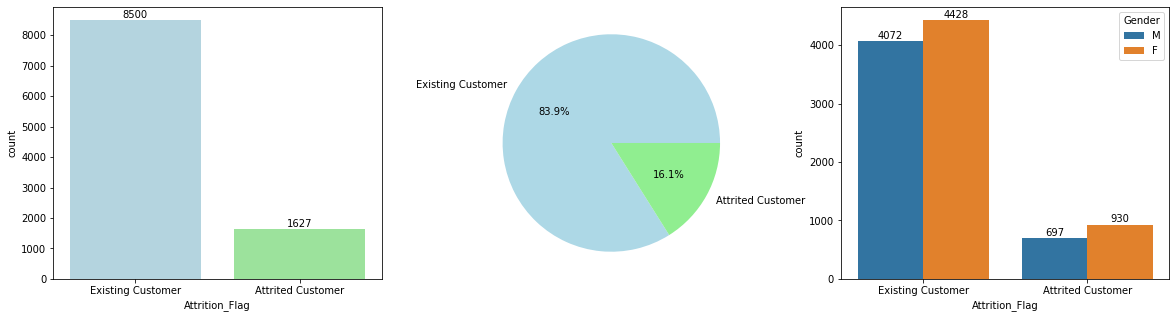

In [596]:
fig1 , a1 = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Attrition_Flag',data=df,ax=a1[0],palette=['lightblue','lightgreen']) 
auto(a1[0])
a1[1].pie(df.Attrition_Flag.value_counts(),labels=df.Attrition_Flag.value_counts().index,autopct='%1.1f%%',colors=['lightblue','lightgreen'])
sns.countplot(x='Attrition_Flag',hue='Gender',data=df,ax=a1[2])
auto(a1[2])

## **Male Female Count**

In [597]:
def auto(axis):
    for i in axis.patches:
           axis.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, i.get_height(),ha='center', va='bottom')

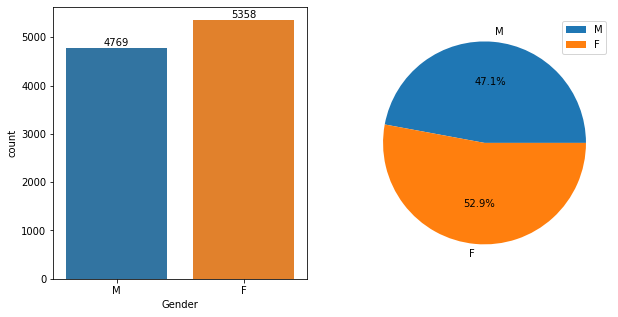

In [598]:
fig , a = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Gender',data=df,ax=a[0])
auto(a[0])
a[1].pie(df.Gender.value_counts().sort_values(),labels=df.Gender.value_counts().sort_values().index,autopct='%1.1f%%')
a[1].legend()

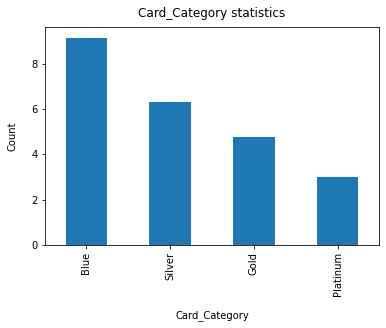

In [599]:
np.log(df['Card_Category'].value_counts()).plot(kind='bar')
plt.xlabel("Card_Category", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Card_Category statistics", y=1.02);

## **Age of Customers**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


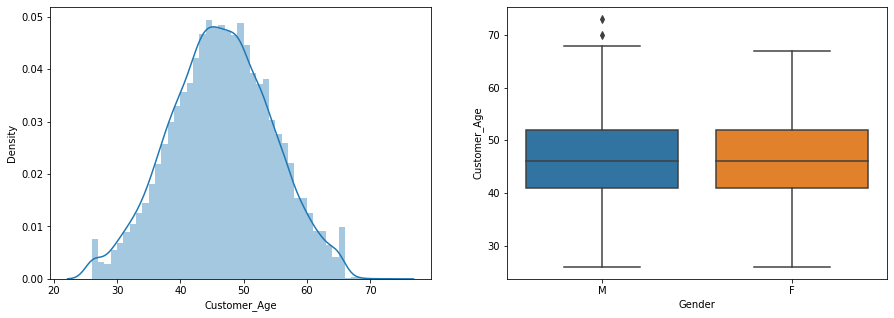

In [600]:
fig2 , a2 = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Customer_Age'] ,ax=a2[0] ,kde=True)
sns.boxplot(y='Customer_Age',x='Gender',data=df,ax=a2[1])

## **Dependent Count data**

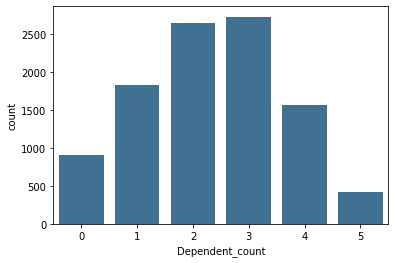

In [601]:
a3=sns.countplot(x='Dependent_count',data=df, color='#3274A1')
plt.show()

# Processing Data for Machine Learning

In [602]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

Converting Attrition Flag column to a boolean categorical value

In [603]:
df['Attrition_Flag'] = (df['Attrition_Flag'] == 'Existing Customer')

Converting the gender column to boolean categorical value

In [604]:
df['Gender'] = (df['Gender'] == 'M')

Getting dummy variables for categorical values

In [605]:
df = pd.get_dummies(data=df, columns=['Dependent_count','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

## Balancing the data


As we can see the data is very imbalanced and to counter that we're going to balance the data by oversampling the minority.

In [606]:
df['Attrition_Flag'].value_counts()

True     8500
False    1627
Name: Attrition_Flag, dtype: int64

In [607]:
majority_rows = df[df['Attrition_Flag'] == 1 ]
majority_count = majority_rows.shape[0]
minority_rows = df[df['Attrition_Flag']==0].sample(majority_rows.shape[0], replace=True)

df_balanced = pd.concat([ majority_rows , minority_rows])
df_balanced = df_balanced. sample (frac=1).reset_index (drop=True)
df_balanced.shape

(17000, 42)

# Machine Learning


## Model 1: Using Logistic Regression



Setting the predictors and target variables.

In [608]:
predictors = ['Dependent_count_0','Dependent_count_1', 'Dependent_count_2', 'Dependent_count_3', 'Dependent_count_4', 'Dependent_count_5','Gender','Customer_Age','Credit_Limit','Total_Trans_Amt','Avg_Utilization_Ratio']
X = df_balanced[predictors].values
Y = df_balanced['Attrition_Flag'].values

Splitting the data for training the model and testing the accuracy later.

In [609]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Initializing the classifier object using logistic regression and training the model.

In [610]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Getting probabilities for each of the test data.

In [611]:
prob_attrition = clf.predict_proba(X_test)[:,1]

Setting a threshold value for it the model to make predictions.

In [612]:
threshold = 0.5

Making predictions based on the threshold value.

In [613]:
predicts = (prob_attrition>threshold).astype(int)

Making a confusion matrix using the test data and predictions made by the model. We can see that model makes quite a lot of false negative and false positive errors but the amount of accurate predictions still exceeds it.

In [614]:
matrix = confusion_matrix(Y_test, predicts)
matrix

array([[1699,  506],
       [ 736, 1309]])

Calculating the accuracy of the current model using the confusion matrix.  As we saw earlier higher number of accurate results were given.

In [615]:
accuracy = (matrix[0,0]+matrix[1,1])/matrix.sum()
accuracy

0.707764705882353

## Model 2: Using tree classifier


Selecting the predictor columns.

In [616]:
predictors = ['Credit_Limit','Total_Trans_Amt', 'Total_Trans_Ct','Avg_Utilization_Ratio']

Splitting the data for training and testing.

In [617]:
X = df_balanced[predictors].values

y = df_balanced['Attrition_Flag'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training the model with the training data and using the decision tree classification algorithm.

In [618]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Plotting the decision tree

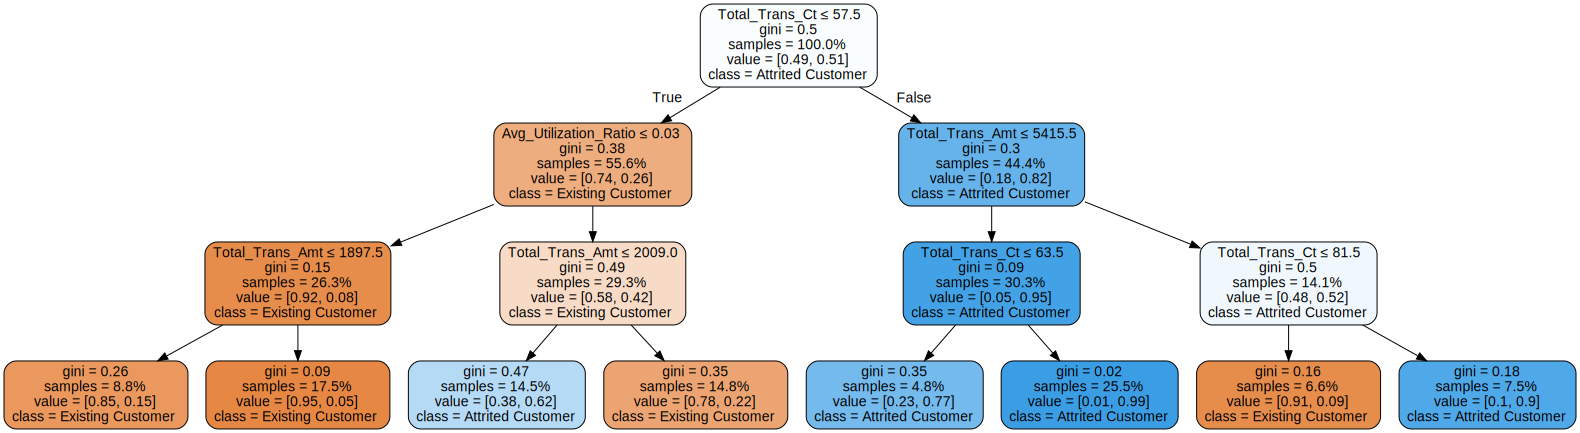

In [619]:
target_names = ['Existing Customer','Attrited Customer']
dot_data = export_graphviz(clf, precision=2,
feature_names=predictors,
proportion=True,
class_names=target_names,
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph

Measuring the accuracy of the model.

In [620]:
predicts = clf.predict(X_test)
(predicts == y_test).mean()

0.8628235294117647

As we saw the accuracy of the model is pretty high, let's see what features affect predictions the most.

In [621]:
clf.feature_importances_

array([0.        , 0.20579   , 0.68994205, 0.10426795])

Making a confusion matrixf using the test and predicted data.

In [622]:
matrix = confusion_matrix(y_test, predicts)
matrix

array([[1850,  355],
       [ 228, 1817]])

## Model 3: Using Naive Bayes (Unbalanced)


Selecting the predictor features.

In [623]:
predictors = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
predictors.append('Total_Revolving_Bal')

Splitting the data for training and testing.

In [624]:
X = df[predictors].values

y = df['Attrition_Flag'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training the Naive Bayes classification model.

In [625]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

Testing the accuracy of the predictions using the test data

In [626]:
y_pred = clf.predict(X_test)
(y_pred == y_test).mean()

0.8621642969984202

Making a confusion matrix.

In [627]:
matrix = confusion_matrix(y_pred, y_test)
matrix

array([[ 157,   87],
       [ 262, 2026]])

We can see that most of the errors are from false negatives and the overall accuracy is the highest when compared to any of the other classification algorithms.

## Model 4: Naive Bayes (Balanced)


Selecting the predictor features.

In [628]:
predictors = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
predictors.append('Total_Revolving_Bal')

Splitting the test and training data.

In [629]:
X = df_balanced[predictors].values

y = df_balanced['Attrition_Flag'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training the naive bayes classification model.

In [630]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

Testing the accuracy of the model using the testing data.

In [631]:
y_pred = clf.predict(X_test)


In [632]:
(y_pred == y_test).mean()

0.9009411764705882

This the highest amount of accuracy we've seen so far.

# Cluster Analysis


Importing the libraries needed for cluster analysis.

In [633]:
from sklearn.cluster import KMeans

Selecting the variables on which the cluster should be based on.

In [634]:
predictors = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Attrition_Flag']

Normalizing the data for cluster analysis using Z-score normalization.

In [635]:
X = df[predictors].apply(zscore).values

Making 7 clusters and storing the cluster information.

In [636]:
kmeans = KMeans(n_clusters = 7, random_state=42)
cluster_nums = kmeans.fit_predict(X)

Countplot based on the number of rows in each cluster.

Text(0, 0.5, 'Count')

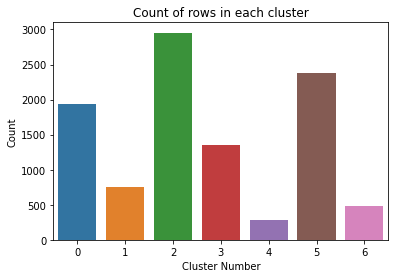

In [637]:
sns.countplot(x=cluster_nums)
plt.title('Count of rows in each cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Count')

Making a scatter plot.

Text(0, 0.5, 'Total Transaction Count')

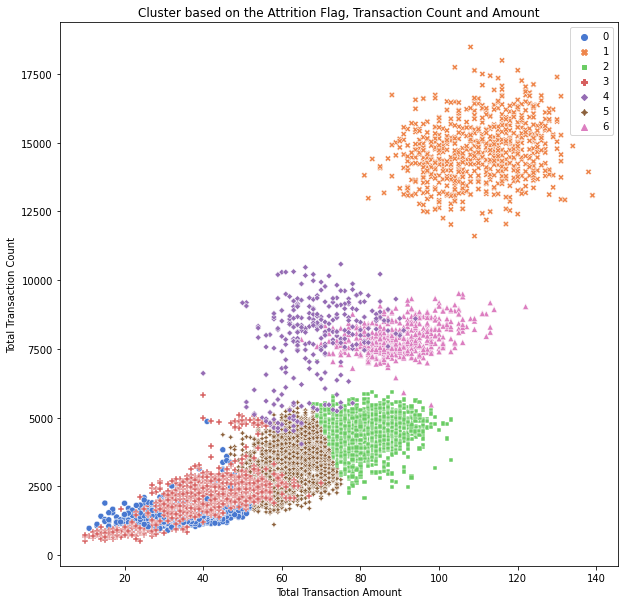

In [638]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=df['Total_Trans_Amt'], x=df['Total_Trans_Ct'], hue=cluster_nums, palette='muted', style=cluster_nums)
plt.title('Cluster based on the Attrition Flag, Transaction Count and Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')

Checking inertia to see how good the cluster are.

In [639]:
kmeans.inertia_

1512.4642777101587

# **Conclusion**

From the logistic regression performed on the Bank churners dataset. From the data information, No categorical variables found. There appears to be no missing data; at least none in the form of NA values.

Four card category observed.

Female count found to be more in comparison to Male.

We can see that Naive Bayes Classification works and provides the best prediction on both balanced and unbalanced data using the Total Transaction Amount, Total Transaction Count, Average Utilization Ratio and Total amount as revolving balance features.

Classification tree also gives very good predictions using Credit_Limit,Total Transaction Amount, Total Transaction Count and Avergae Utilization Ratio. Though we saw from the feature importances that credit limit doesn't affect the predictions made.

Logistic regression performs the worst when comparede to other classification algorithms.